In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

In [2]:
ALPHA = 0.01
B = 10

In [3]:
def f(theta):
  return 1/pow(theta, 2)

In [4]:
def c(theta):
  return pow(theta,B) - ALPHA

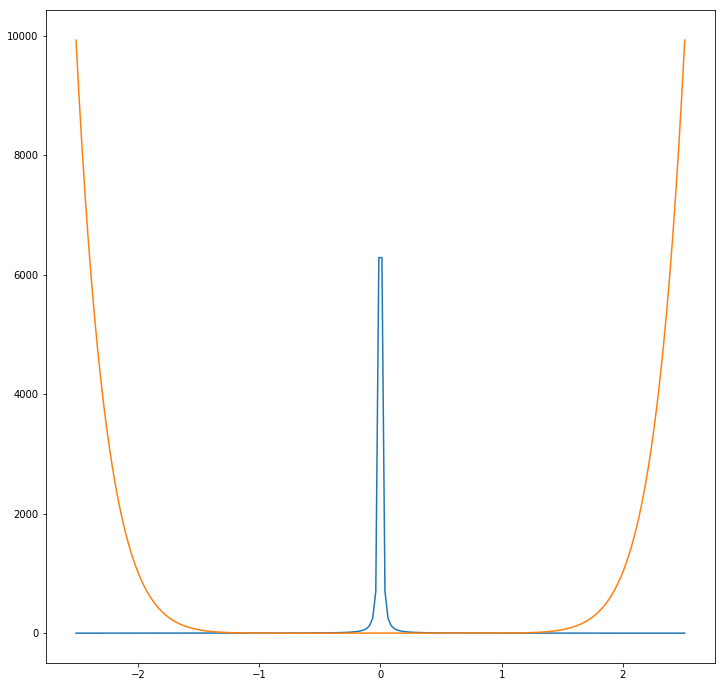

In [5]:
theta = np.linspace(-2.51, 2.51, 200)
f_val = f(theta)
c_val = c(theta)
plt.figure(figsize=(12, 12))
plt.plot(theta, f_val, theta, c_val)
plt.show()

# Let's use scipy function to get an idea what we could get

In [6]:
fun = f
cons = ({'type': 'ineq', 'fun': lambda x : -c(x)})
bnds = ((0), (10))

In [7]:
res = optimize.minimize(fun, (0.05), method='SLSQP', constraints=cons)

In [8]:
res

     fun: 2.5118864012987694
     jac: array([-7.96214297])
 message: 'Optimization terminated successfully.'
    nfev: 118
     nit: 36
    njev: 36
  status: 0
 success: True
       x: array([0.63095735])

# Penalty method

In [9]:
def obj_func(theta, alpha):
  '''Objective function coupled with the penalty'''
  return 1/(theta**2.0) + (alpha/2)*(np.abs(theta**10 - ALPHA) ** 2)

In [10]:
def obj_drv(theta, alpha):
  '''Derivation of the objective function using finite differences'''
  h = 0.01
  return (obj_func(theta + h, alpha) - obj_func(theta - h, alpha)) / 2*h

In [11]:
theta0 = 0.5 # initial value
lr = 4.0  # learning rate
err1 = 0.000001 # condition for the gradient descent
err2 = 0.000001 # condition for the penalty method termination
alpha = 100 # initial alpha


theta = theta0
thetas = []
iterations = []
iteration = 0
alphas_log = []
while True:
  cur_theta_outer = theta
  while True:
    prev_theta = theta
    # GD
    theta = theta - lr*obj_drv(theta, alpha=alpha)
    thetas.append(theta)
    alphas_log.append(alpha)
    iterations.append(iteration)
    iteration += 1
    if abs(prev_theta - theta) < err1:
      break
      
  # Update alpha
  alpha = alpha + 100
  if abs(cur_theta_outer - theta) < err2:
    break

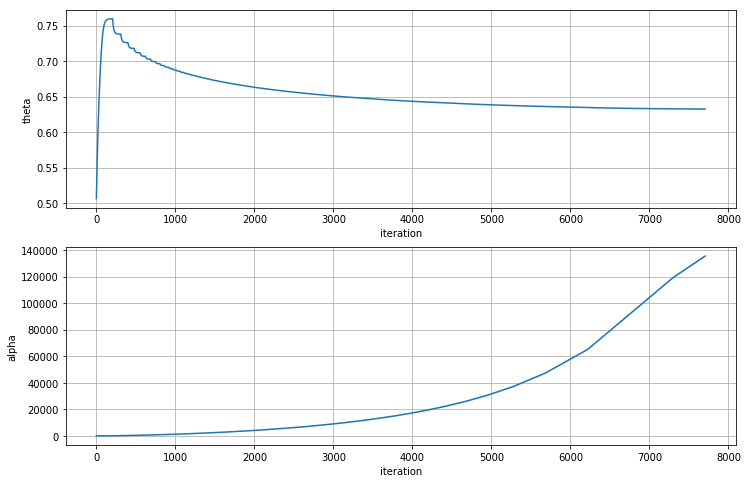

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(iterations, thetas)
plt.ylabel('theta')
plt.xlabel('iteration')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(iterations, alphas_log)
plt.ylabel('alpha')
plt.xlabel('iteration')
plt.grid()

### Results for the penalty method

In [13]:
print(theta, f(theta))

0.6324816374127435 2.4997936316346596


# Lagrange Duality Method

In [14]:
def obj_func(theta, lmd):
  # Lagrangian
  return 1/(theta**2.0) + lmd*(theta**10-ALPHA)

def obj_drv_theta(theta, lmd):
  # Derivative of the lagrangian w.r.t. theta
  h = 0.01
  return (obj_func(theta + h, lmd) - obj_func(theta - h, lmd)) / 2*h

def obj_drv_lambda(theta, lmd):
  # Derivative of the lagrangian w.r.t. lambda
  h = 0.01
  return (obj_func(theta, lmd + h) - obj_func(theta, lmd - h)) / 2*h

In [15]:
theta0 = 0.875 # initial theta
lmd0 = 1.0 # initial lambda

lr1 = 100.0 # learning rate for the theta 
lr2 = 300.0 # learning rate for the lambda
err1 = 0.000001 # termination condition for the theta
err2 = 0.00000001 # termination condition for the lambda

thetas = []
iterations = []
iteration = 0
lmd_log = []

theta = theta0
lmd = lmd0
while True:
  cur_theta_outer = theta
  while True:
    prev_theta = theta
    # GD
    theta = theta - lr*obj_drv_theta(theta, lmd=lmd)

    thetas.append(theta)
    lmd_log.append(lmd)
    iterations.append(iteration)
    iteration += 1
    if abs(prev_theta - theta) < err1:
      break
  
  # Update lambda
  lmd = max(0, lmd + lr2 * obj_drv_lambda(theta, lmd=lmd))
  if abs(cur_theta_outer - theta) < err2:
    break

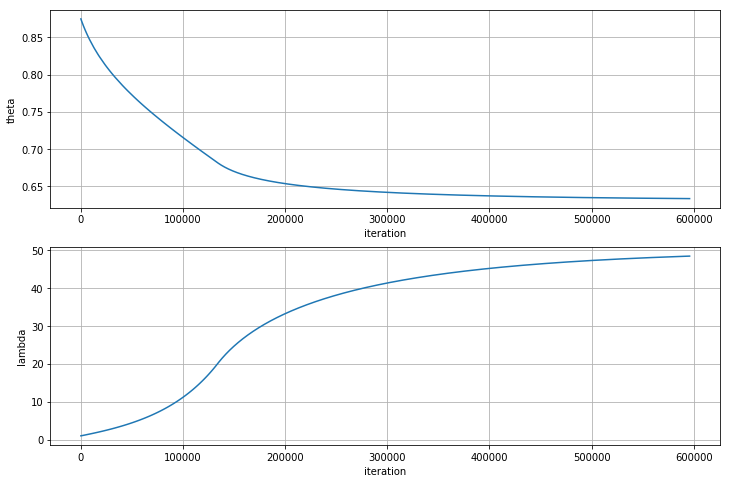

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(iterations, thetas)
plt.ylabel('theta')
plt.xlabel('iteration')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(iterations, lmd_log)
plt.ylabel('lambda')
plt.xlabel('iteration')
plt.grid()

### Results for the duality method

In [17]:
print(theta, f(theta))

0.6328580249362176 2.496821049149483
